In [1]:
from pythtb import tb_model
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import scipy.signal

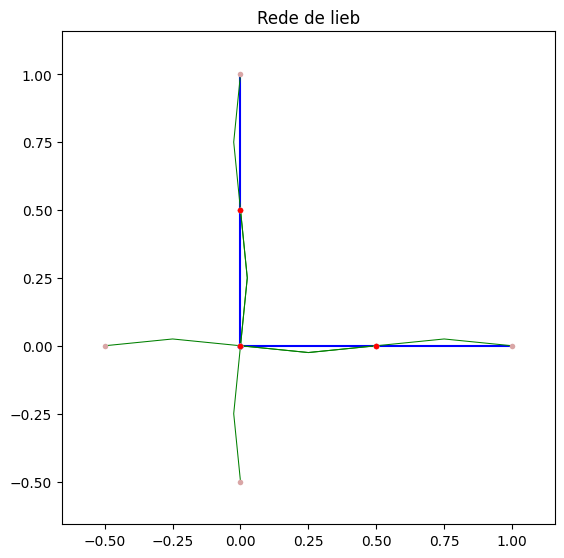

In [2]:
# parâmetros de rede:
a = 1.0
lat = [
    [a, 0.0],
    [0.0, a]
]

# posições dos orbitais:
orb = [
    [0.0, 0.0], # A (canto)
    [0.5, 0.0], # B (borda X)
    [0.0, 0.5] # C (borda Y)
]

lieb = tb_model(2, 2, lat, orb)

t = -1.0 # hopping NN

# energias on-site
e_A = 0.0
e_B = 0.5
e_C = -0.5

lieb.set_hop(t, 0, 1, [0, 0])
lieb.set_hop(t, 0, 1, [-1, 0])
lieb.set_hop(t, 0, 2, [0, 0])
lieb.set_hop(t, 0, 2, [0, -1])

fig, ax = lieb.visualize(0,1)
ax.set_title("Rede de lieb")
#fig.savefig("rede_lieb.png")

----- k_path report begin ----------
real-space lattice vectors
 [[1. 0.]
 [0. 1.]]
k-space metric tensor
 [[1. 0.]
 [0. 1.]]
internal coordinates of nodes
 [[0.  0. ]
 [0.5 0. ]
 [0.5 0.5]
 [0.  0. ]]
reciprocal-space lattice vectors
 [[1. 0.]
 [0. 1.]]
cartesian coordinates of nodes
 [[0.  0. ]
 [0.5 0. ]
 [0.5 0.5]
 [0.  0. ]]
list of segments:
  length =     0.5  from  [0. 0.]  to  [0.5 0. ]
  length =     0.5  from  [0.5 0. ]  to  [0.5 0.5]
  length = 0.70711  from  [0.5 0.5]  to  [0. 0.]
node distance list: [0.      0.5     1.      1.70711]
node index list:    [  0  58 117 199]
----- k_path report end ------------

k_vec shape: (200, 2)
evals shape: (200, 3)


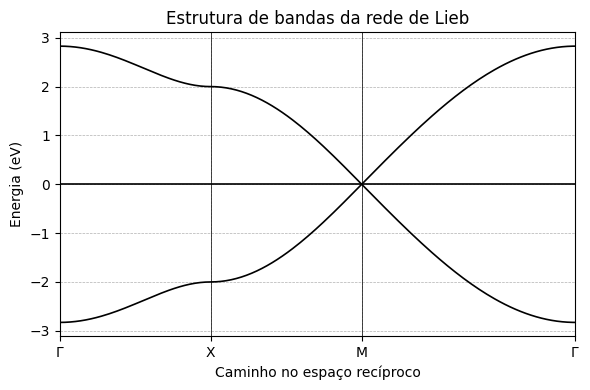

In [9]:
# cálculos da estrutura de bandas

path = [[0., 0.], [0.5, 0.], [0.5, 0.5], [0., 0.]]
labels = (r'$\Gamma$', 'X', 'M', r'$\Gamma$')
nk = 200

k_vec, k_dist, k_node = lieb.k_path(path, nk, report = True)
evals = lieb.solve_all(k_vec)
evals = evals.T

#print("k_vec shape:", np.shape(k_vec))
#print("evals shape:", np.shape(evals))

# plot da estrutura de bandas

fig, ax = plt.subplots(figsize = (6,4))
for n in range(evals.shape[1]):
    ax.plot(k_dist, evals[:, n], 'k-', lw = 1.2)

ax.set_xlim(k_node[0], k_node[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(labels)

for n in range(len(k_node)):
    ax.axvline(x = k_node[n], color = 'k', lw = 0.5)

ax.set_title("Estrutura de bandas da rede de Lieb")
ax.set_xlabel("Caminho no espaço recíproco")
ax.set_ylabel("Energia (eV)")
ax.grid(True, ls = '--', lw = 0.5)

fig.tight_layout()
#fig.savefig("lieb_bandas.png")
plt.show()

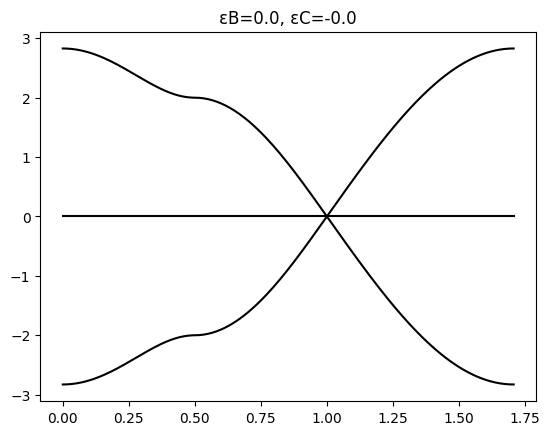

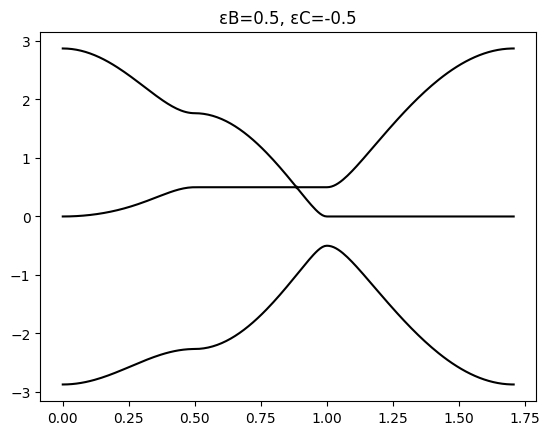

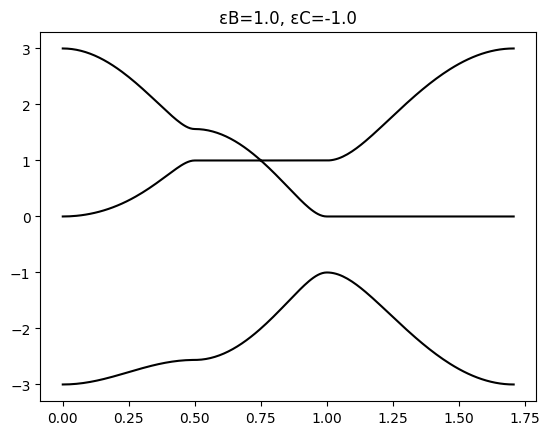

In [12]:
# podemos variar o valor de epsilon B e epsilon C, enquanto epsilon A fica fixo em 0

for delta in [0.0, 0.5, 1.0]:
    lieb.set_onsite([0.0, delta, -delta], mode = 'reset')
    evals = lieb.solve_all(k_vec)
    evals = evals.T
    plt.figure()
    for n in range(3):
        plt.plot(k_dist, evals[:, n], 'k')
    plt.title(f"εB={delta}, εC={-delta}")
    #plt.savefig(f"lieb_delta{delta}.png")
